In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("supermarket_sales.csv")
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Data Preparation

In [4]:

data.Date = pd.to_datetime(data.Date)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [5]:
data['Total Revenue'] = data.Total

In [6]:
data['Year'] = data.Date.dt.year
data['Month'] = data.Date.dt.month

In [7]:
data[['Hour', 'Min']] = data['Time'].str.split(':', expand = True)

In [54]:
data = data.astype({'Hour':'int'})
data = data.astype({'Month':'int'})

In [9]:
data['Total Revenue'] = data.Total
data.drop(columns = 'Total', inplace = True)
data['Revenue after Tax'] = data['Total Revenue'] - data['Tax 5%']

# Exploratory Data Analysis

In [10]:
data['Product line'].unique()

array(['Health and beauty', 'Electronic accessories',
       'Home and lifestyle', 'Sports and travel', 'Food and beverages',
       'Fashion accessories'], dtype=object)

In [11]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

In [12]:
data.Payment.unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [13]:
data.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [14]:
data['Customer type'].unique()

array(['Member', 'Normal'], dtype=object)

Text(0.5, 1, 'Heatmap of the Dataset')

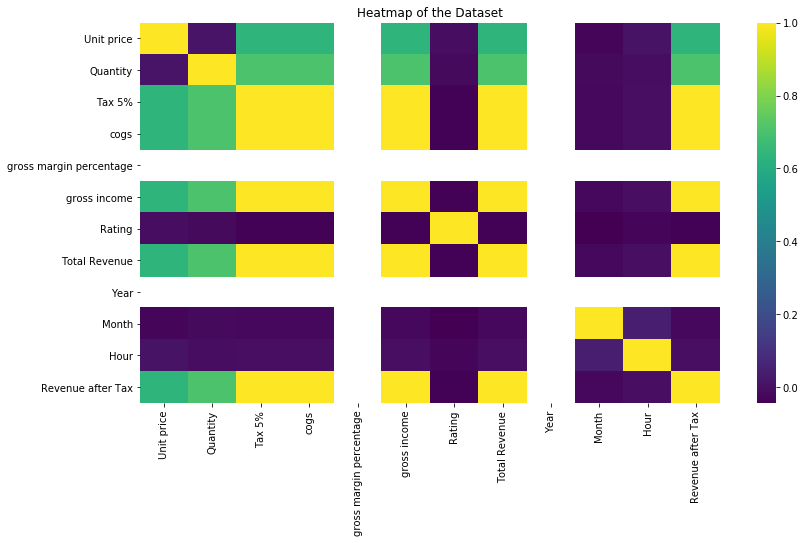

In [15]:
dataa = data.corr()
plt.figure(figsize = (13,7))
sns.heatmap(dataa, cmap = 'viridis').set_title('Heatmap of the Dataset')


# Payment System Analysis

In [16]:
data.Payment.value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

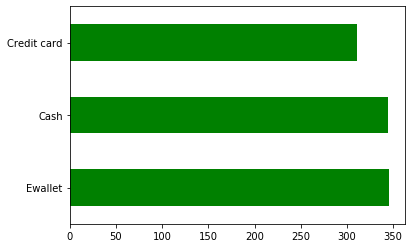

In [17]:
data.Payment.value_counts().plot(kind = 'barh', color = 'green')

The most used payment system is E-wallet, though it's close

Text(0.5, 1.0, 'Payment channel by Customers')

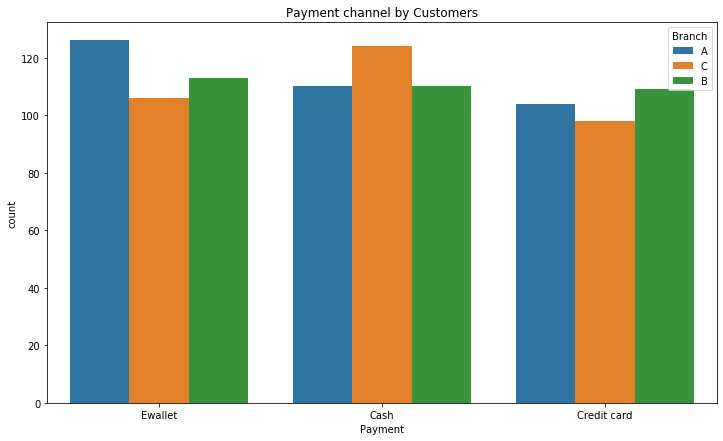

In [18]:
plt.figure(figsize = (12,7))
sns.countplot(x = 'Payment', hue = 'Branch', data = data).set_title('Payment channel by Customers')

# Customer Analysis

In [20]:
data.groupby(['Customer type', 'Product line']).Quantity.sum().sort_values()

Customer type  Product line          
Normal         Home and lifestyle        421
               Health and beauty         426
               Sports and travel         427
Member         Health and beauty         428
               Electronic accessories    429
               Fashion accessories       439
Normal         Food and beverages        446
               Fashion accessories       463
Member         Home and lifestyle        490
               Sports and travel         493
               Food and beverages        506
Normal         Electronic accessories    542
Name: Quantity, dtype: int64

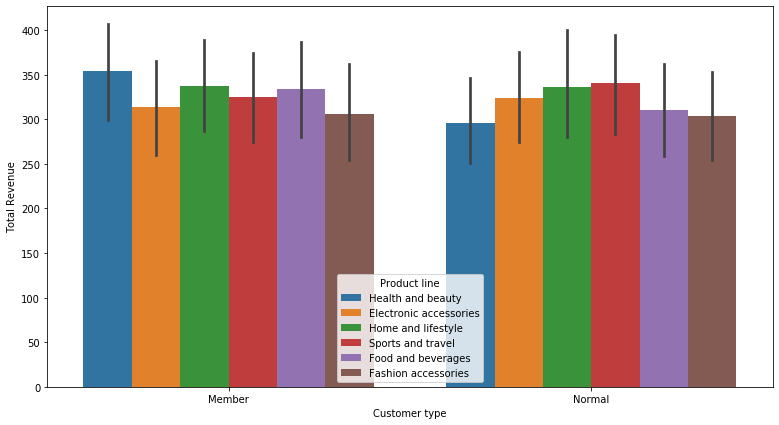

In [21]:
plt.figure(figsize = (13,7))
sns.barplot(x = 'Customer type', y = 'Total Revenue', hue = 'Product line', data = data)

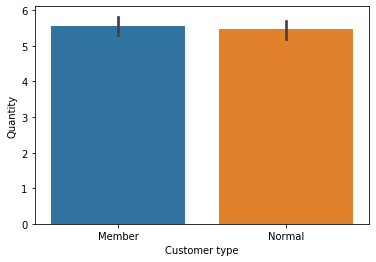

In [22]:
sns.barplot(x = 'Customer type', y = 'Quantity', data = data)

This shows the total number of order by each customer type


Member = 501
Normal = 499

<Figure size 5040x648 with 0 Axes>

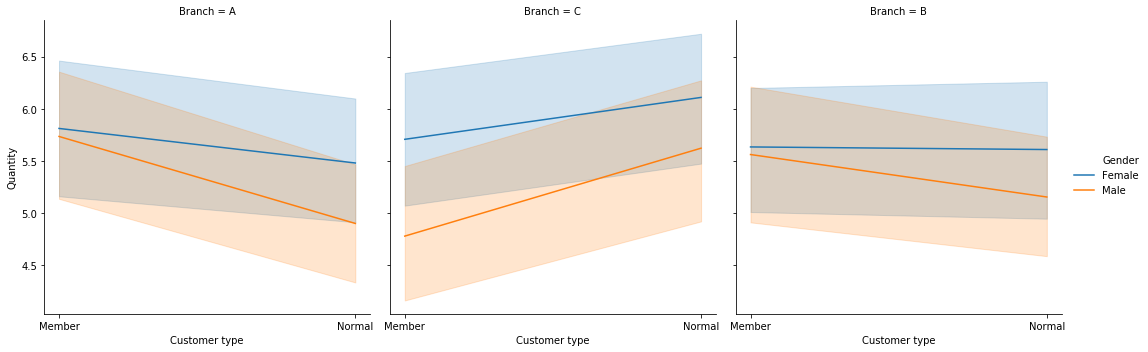

In [51]:
plt.figure(figsize = (70,9))
sns.relplot(x="Customer type",  y = 'Quantity', col= 'Branch',kind = 'line',hue = 'Gender', data =data)
plt.show()

# Product Analysis




Most Ordered Product

In [24]:
data.groupby('Product line').Quantity.sum().sort_values()

Product line
Health and beauty         854
Fashion accessories       902
Home and lifestyle        911
Sports and travel         920
Food and beverages        952
Electronic accessories    971
Name: Quantity, dtype: int64

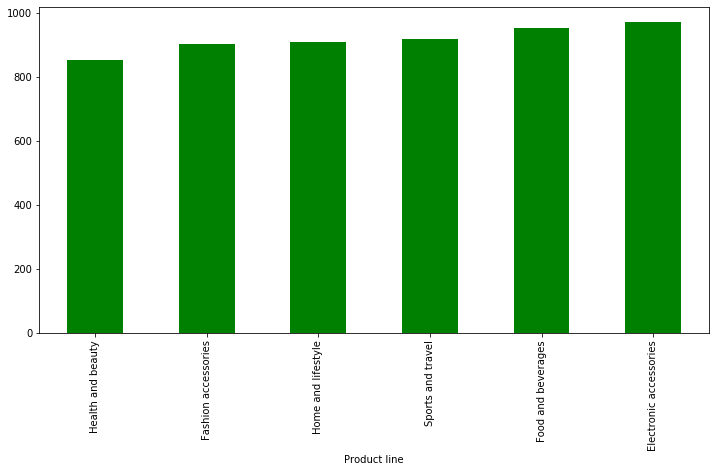

In [25]:
plt.figure(figsize = (12,6))
data.groupby('Product line').Quantity.sum().sort_values().plot(kind = 'bar', color = 'green')

Health and Beauty products were the least sold with Electronics accessory products having the most sales.

.

Average Rating of Products

In [26]:
rating =data.groupby('Product line')['Rating'].mean().sort_values()

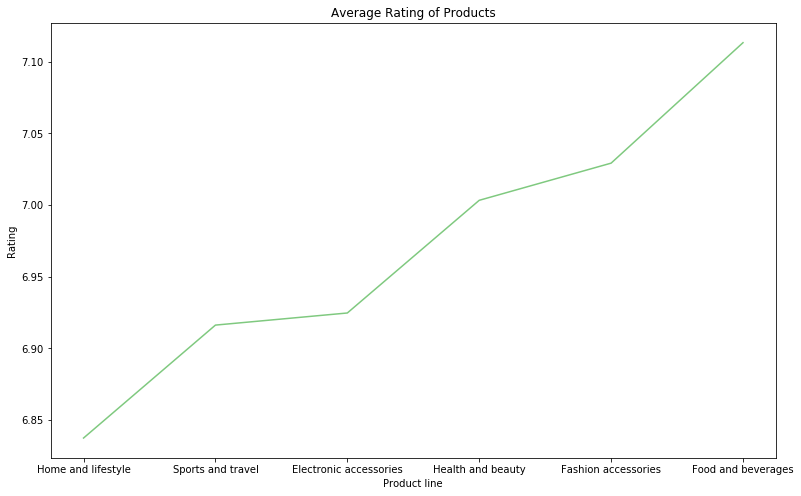

In [27]:
data.groupby('Product line')['Rating'].mean().sort_values().plot(kind = 'line',figsize = (13,8), title = 'Average Rating of Products',ylabel = 'Rating', colormap = 'Accent')

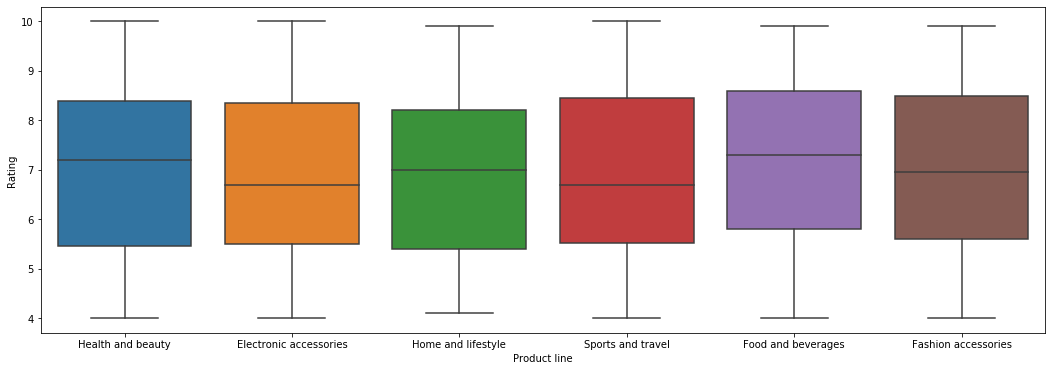

In [28]:
plt.figure(figsize = (18,6))
sns.boxplot(x = 'Product line', y = 'Rating', data = data,)


Electronic Accessory Products had a lower Rating when compared to that  of Health and Beauty products, despite having more sales.

This implies the ratings of products by customers did not neccessarily impact sales made.

.

.

Gross Income per Products

In [29]:
data.groupby('Product line')['gross income'].sum().sort_values()

Product line
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Fashion accessories       2585.9950
Electronic accessories    2587.5015
Sports and travel         2624.8965
Food and beverages        2673.5640
Name: gross income, dtype: float64

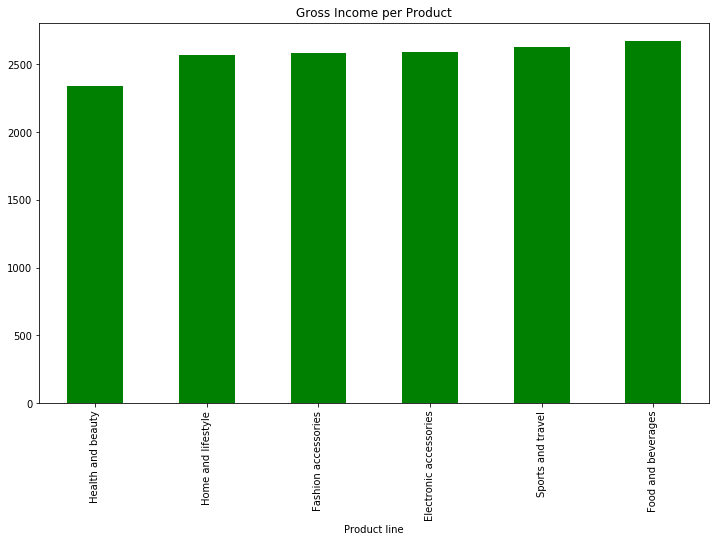

In [30]:
data.groupby('Product line')['gross income'].sum().sort_values().plot(figsize = (12,7),kind = 'bar',color = 'green' ,title = "Gross Income per Product")

.

.

Average Cost of Goods Sold(COGS) per Product 

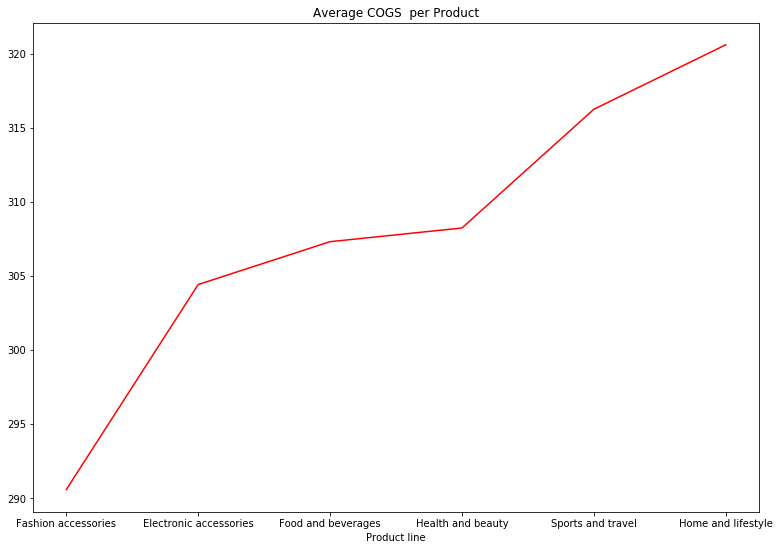

In [31]:
data.groupby('Product line')['cogs'].mean().sort_values().plot(figsize = (13,9),title = "Average COGS  per Product", color = 'red')

In [32]:
filtered = data[(data['Product line'] == 'Health and beauty') | (data['Product line'] == 'Electronic accessories') | (data['Product line'] == 'Food and beverages')]

We are going to compare products with high gross income (Food and bevearage, Electronic accessories) with Health and Beauty product.

We'll check the performance of the products in each branch, over the last three months, also check the cost of goods sold for each to see if it influences sales

In [33]:
filtered.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Date,...,cogs,gross margin percentage,gross income,Rating,Total Revenue,Year,Month,Hour,Min,Revenue after Tax
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,2019-01-05,...,522.83,4.761905,26.1415,9.1,548.9715,2019,1,13,08,522.83
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,2019-03-08,...,76.40,4.761905,3.8200,9.6,80.2200,2019,3,10,29,76.40


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 936x648 with 0 Axes>

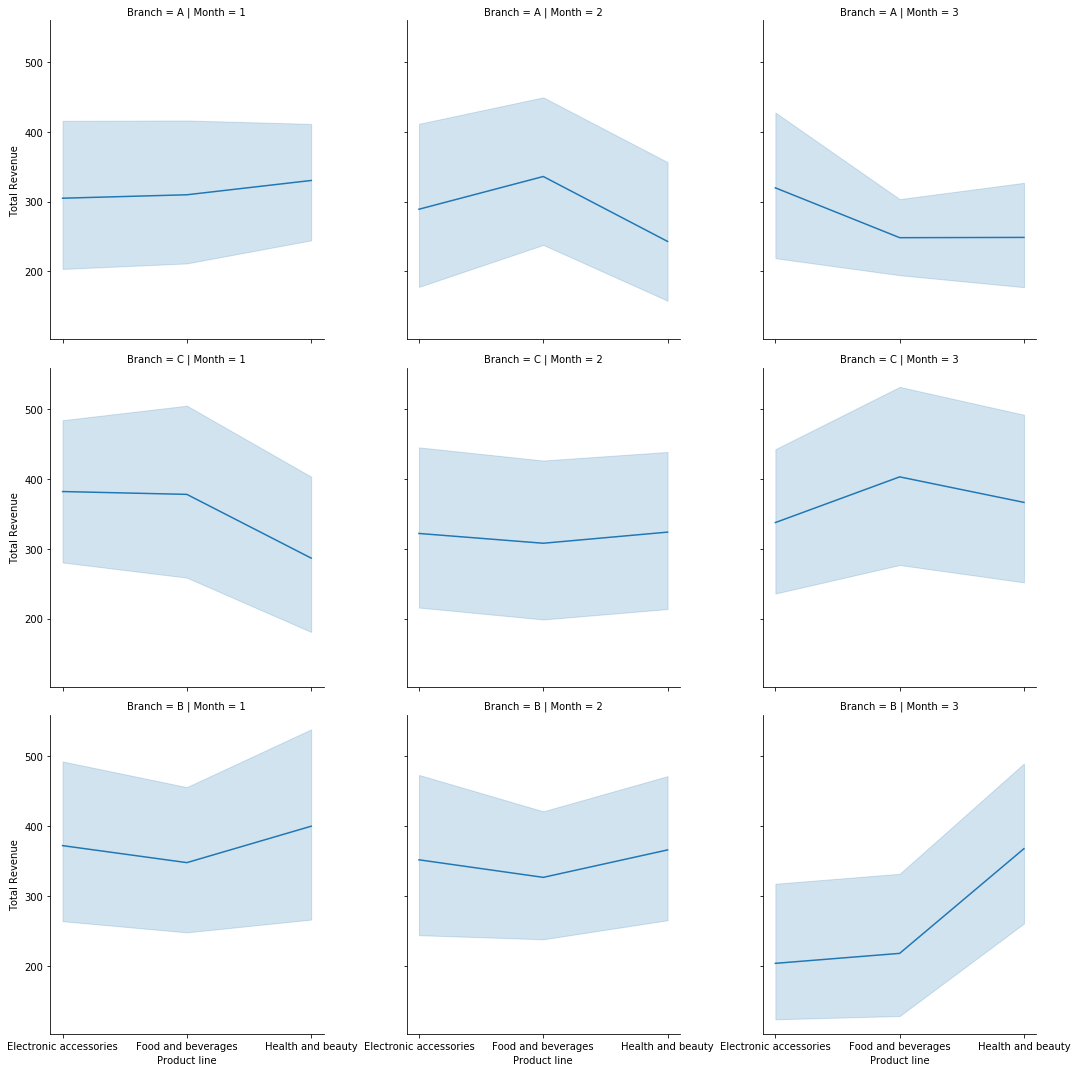

In [34]:
plt.figure(figsize = (13,9))
sns.relplot(x="Product line",  y = 'Total Revenue', col= 'Month',row = 'Branch', kind="line", data =filtered)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 936x648 with 0 Axes>

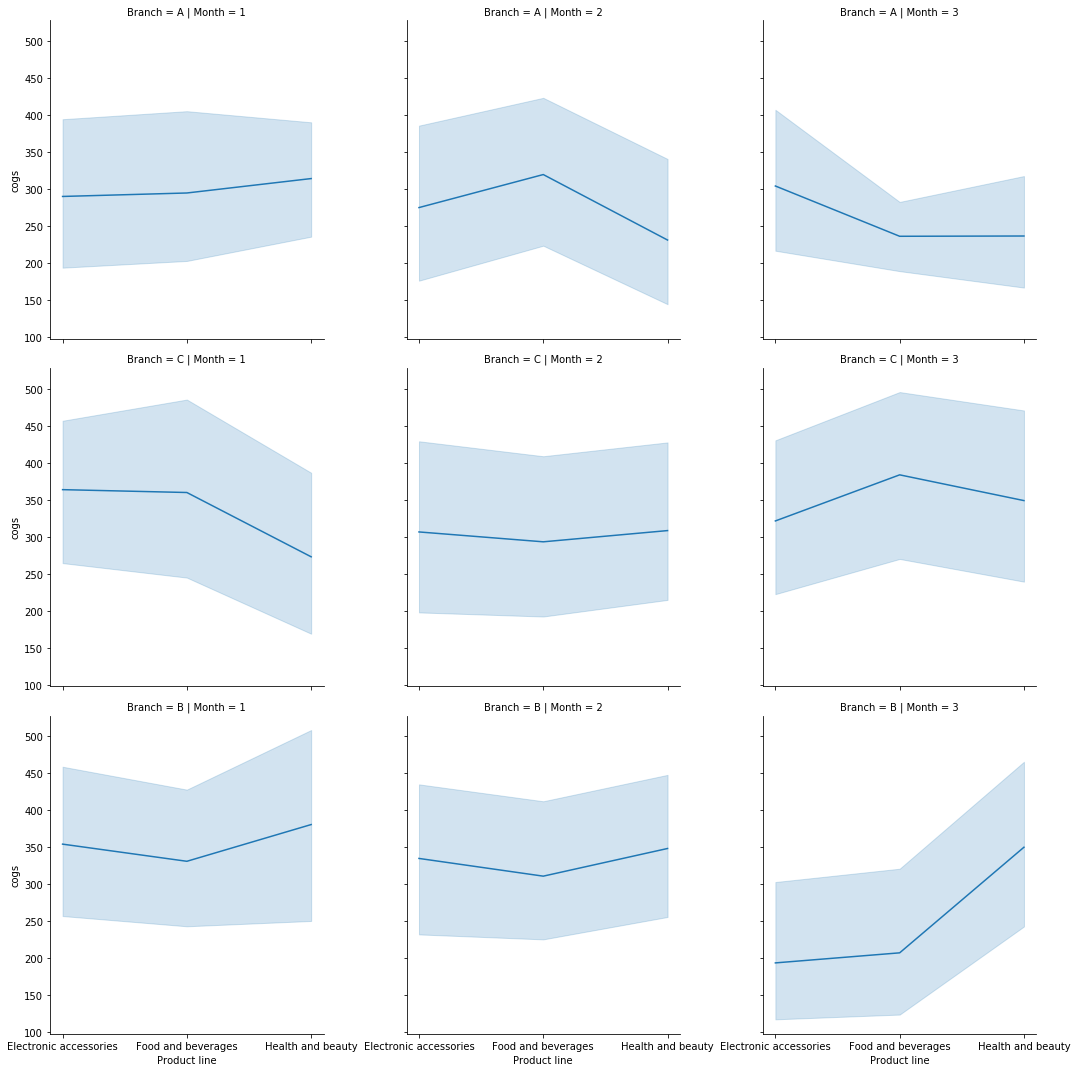

In [35]:
plt.figure(figsize = (13,9))
sns.relplot(x="Product line",  y = 'cogs', col= 'Month',row = 'Branch', kind="line", data =filtered)
plt.show

In [38]:
data.groupby('Product line')['Hour'].mean().sort_values()

Product line
Home and lifestyle        14.450000
Sports and travel         14.656627
Health and beauty         14.868421
Electronic accessories    14.988235
Fashion accessories       15.056180
Food and beverages        15.385057
Name: Hour, dtype: float64

This implies that most products are ordered between the periods of 2:30pm - 3:40pm 

# Branch Analysis

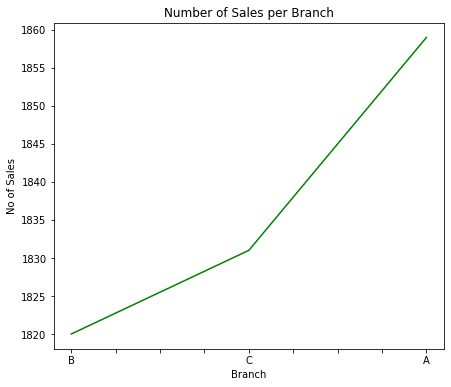

In [39]:
plt.figure(figsize = (7,6))
data.groupby('Branch')['Quantity'].sum().sort_values().plot(title = 'Number of Sales per Branch', ylabel = 'No of Sales',color = 'green')

<Figure size 936x648 with 0 Axes>

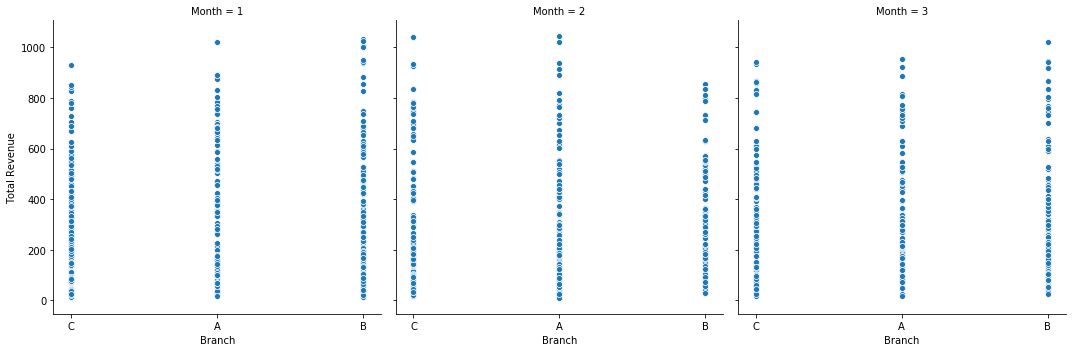

In [57]:
plt.figure(figsize = (13,9))
sns.relplot(x = 'Branch',y = 'Total Revenue', col= 'Month', kind="scatter", data =data)
plt.show()

Number of Orders per hour in each branch over the last 3 months

<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 936x648 with 0 Axes>

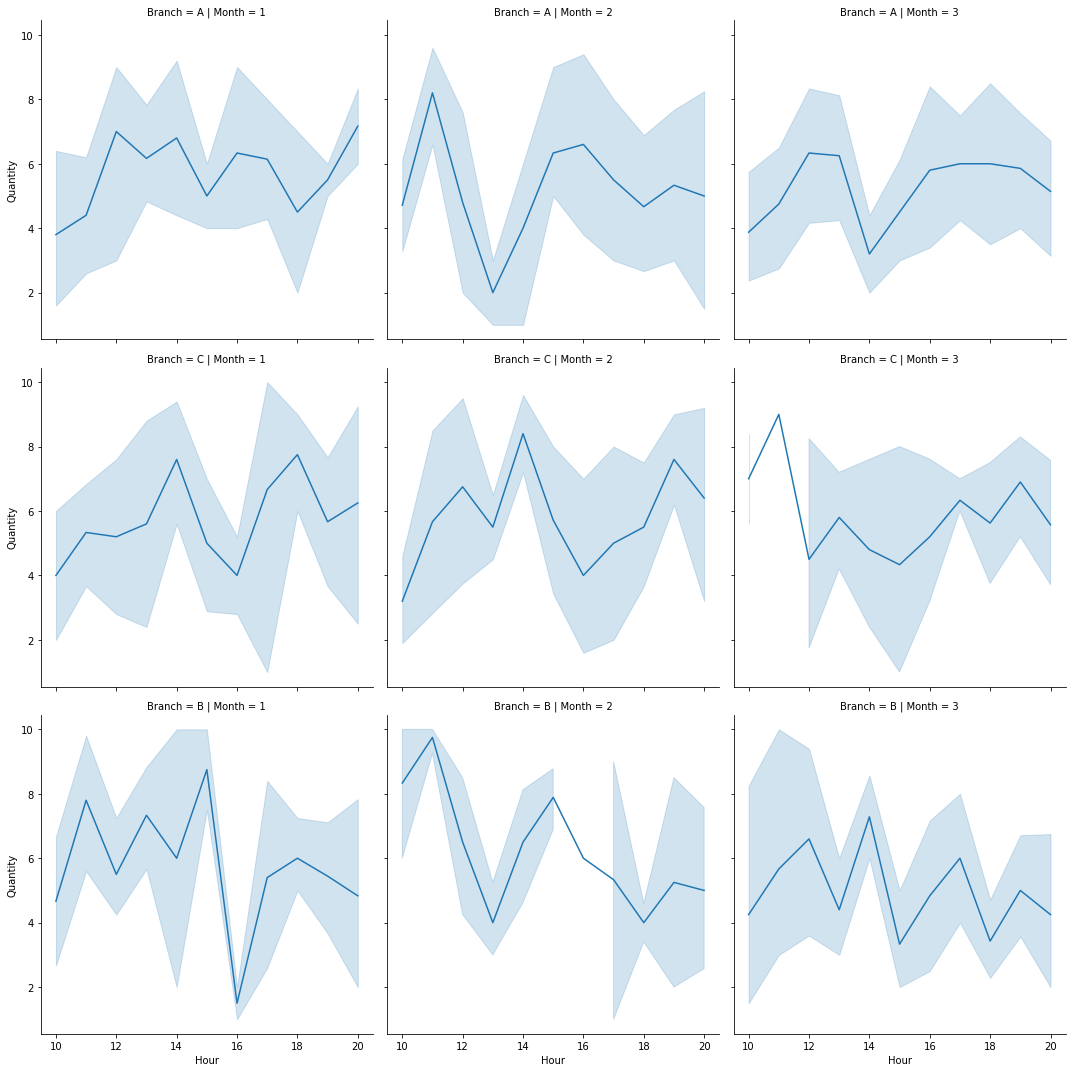

In [40]:
plt.figure(figsize = (13,9))
sns.relplot(x="Hour",  y = 'Quantity', col= 'Month',row = 'Branch', kind="line", data =filtered)
plt.show